# TF-IDF

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression

filepath = 'Sample_data\sample.tsv'
df = pd.read_csv(filepath, sep='\t')
sentences = df['Sentence']
target = df['RE_Type']

from sklearn.utils.multiclass import unique_labels
noRE_labels = [l for l in unique_labels(target.tolist()) if l!="NoRE"]

Using TensorFlow backend.


In [2]:
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, target, test_size=0.33, random_state=1000)
sentences_train

2829    Ubiquitination of human TPP1 also had no detec...
2028    In addition, expression of AGL15 in the phloem...
1145    During S phase the histone chaperones Asf1, CA...
1157    Finally, deletion of RAD17 results in increase...
2610    Yeast two-hybrid assays further revealed that ...
737     Our findings not only suggest a function of ea...
1934    The mRNA expression of glutathione peroxidase ...
3111    The genes HLA complex P5 (HCP5), spermatogenes...
792     The expression levels of 11b-HSD1, 11b-HSD2, C...
1277    Based on the reported zebrafish Ugt gene reper...
1865    RESULTS: We show that FAF1 contains a non-cano...
1559    At the same time basic therapy facilitated a s...
892     The IL-1b-induced p38 signaling pathway was fu...
1217    LY294002, an inhibitor of PI3k, abolished HGF-...
325     The c-FLIPL cleavage product p43FLIP promotes ...
121     We identified seven genes positively correlate...
2151    PURPOSE: To study the relationship of imprinte...
1182    We exa

In [3]:
vectorizer = TfidfVectorizer(min_df=0, lowercase=True, stop_words ='english')
vectorizer.fit(sentences_train)
vectorizer.vocabulary_ # determine vocabulary IDs

{'ubiquitination': 3560,
 'human': 1613,
 'tpp1': 3468,
 'detectable': 995,
 'effects': 1139,
 'known': 1866,
 'protein': 2724,
 'interactions': 1778,
 'tin2': 3435,
 'pot1': 2627,
 'ctc1': 857,
 'stn1': 3255,
 'ten1': 3398,
 'complex': 746,
 'telomerase': 3394,
 'addition': 193,
 'expression': 1278,
 'agl15': 226,
 'phloem': 2544,
 'effectively': 1136,
 'restores': 2928,
 'wild': 3685,
 'type': 3545,
 'flowering': 1351,
 'times': 3434,
 'agl18': 227,
 'mutants': 2212,
 'phase': 2537,
 'histone': 1574,
 'chaperones': 647,
 'asf1': 339,
 'caf': 535,
 'rtt106': 3008,
 'coordinate': 805,
 'deposit': 977,
 'newly': 2295,
 'synthesized': 3352,
 'histones': 1575,
 'h3': 1519,
 'h4': 1520,
 'replicated': 2887,
 'dna': 1070,
 'budding': 520,
 'yeast': 3717,
 'finally': 1335,
 'deletion': 959,
 'rad17': 2777,
 'results': 2934,
 'increased': 1712,
 'association': 354,
 'checkpoint': 657,
 'kinase': 1858,
 'rad53': 2783,
 'lead': 1889,
 'observed': 2368,
 'reduction': 2839,
 'interaction': 1777,


In [4]:
len(vectorizer.vocabulary_)

3737

In [5]:
X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

In [6]:
X_train # a very very sparse matrix

<2315x3737 sparse matrix of type '<class 'numpy.float64'>'
	with 43341 stored elements in Compressed Sparse Row format>

In [7]:
print(X_train) # For each row, only the listsed column IDs have the value 1

  (0, 3560)	0.20387487316269157
  (0, 3468)	0.5040395243716366
  (0, 3435)	0.27607730244701656
  (0, 3398)	0.27607730244701656
  (0, 3394)	0.2646591961420146
  (0, 3255)	0.27607730244701656
  (0, 2724)	0.11899876145705772
  (0, 2627)	0.27607730244701656
  (0, 1866)	0.18814114431138262
  (0, 1778)	0.19113804034324441
  (0, 1613)	0.17636384988204407
  (0, 1139)	0.20496233891007606
  (0, 995)	0.27607730244701656
  (0, 857)	0.27607730244701656
  (0, 746)	0.1334815661766581
  (1, 3685)	0.2632737512313738
  (1, 3545)	0.22270018356143995
  (1, 3434)	0.31245511025480505
  (1, 2928)	0.2778436471704553
  (1, 2544)	0.31245511025480505
  (1, 2212)	0.23926312001788796
  (1, 1351)	0.2675776469081225
  (1, 1278)	0.0998754570285404
  (1, 1136)	0.31245511025480505
  (1, 227)	0.24952912028022078
  :	:
  (2313, 3009)	0.5094841390149157
  (2313, 1880)	0.25474206950745787
  (2313, 1721)	0.24138360159995556
  (2313, 1251)	0.2673438898793483
  (2313, 1076)	0.36845710375663765
  (2313, 589)	0.4203776803154231

In [8]:
X_train.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
vectorizer.fit(sentences) # fit all training set
vectorizer.vocabulary_ # determine vocabulary IDs

{'brain': 536,
 'specific': 3424,
 'grb2': 1606,
 'associated': 382,
 'regulator': 3063,
 'extracellular': 1383,
 'signal': 3352,
 'regulated': 3059,
 'kinase': 1991,
 'erk': 1309,
 'mitogen': 2284,
 'activated': 190,
 'protein': 2926,
 'mapk': 2156,
 'garem': 1523,
 'subtype': 3535,
 'garem2': 1525,
 'contributes': 853,
 'neurite': 2445,
 'outgrowth': 2580,
 'neuroblastoma': 2446,
 'cells': 669,
 'regulating': 3061,
 'signaling': 3353,
 'mapk1': 2157,
 'adaptor': 207,
 'molecule': 2316,
 'egf': 1222,
 'mediated': 2211,
 'pathway': 2659,
 'previously': 2859,
 'identified': 1762,
 'named': 2410,
 'garem1': 1524,
 'characterized': 694,
 'new': 2459,
 'specifically': 3425,
 'expressed': 1373,
 'mouse': 2335,
 'rat': 3001,
 'human': 1731,
 'tyrosines': 3810,
 'tyr': 3808,
 '102': 9,
 '429': 98,
 '551': 112,
 'phosphorylated': 2747,
 'stimulation': 3491,
 'necessary': 2427,
 'binding': 495,
 'furthermore': 1498,
 'shp2': 3343,
 'regulate': 3058,
 'activity': 198,
 'stimulated': 3488,
 'cell

In [10]:
X = vectorizer.transform(sentences)
Y = target
Y

0        Neutral_Regulation
1                      NoRE
2                      NoRE
3                      NoRE
4                   Binding
5              Modification
6        Neutral_Regulation
7        Neutral_Regulation
8                   Binding
9       Positive_Regulation
10                     NoRE
11                     NoRE
12                     NoRE
13                     NoRE
14                     NoRE
15                     NoRE
16                     NoRE
17                     NoRE
18              Association
19        Interaction_Agent
20            Translocation
21                     NoRE
22           Negative_Agent
23       Neutral_Regulation
24                     NoRE
25                     NoRE
26                     NoRE
27        Interaction_Agent
28      Positive_Regulation
29            Translocation
               ...         
3426                   NoRE
3427                   NoRE
3428                   NoRE
3429                   NoRE
3430                

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

models = []
models.append(('LR', LogisticRegression(solver='lbfgs', multi_class='multinomial',max_iter=1000)))
models.append(('SVM', SVC(kernel='linear')))

In [12]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import f1_score
results = []
names = []
def tenFoldCV(scoref):
    for name, model in models:
        kfold = KFold(n_splits=10, shuffle=True, random_state=1)
        cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoref)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

def exclude_NoRE_FScore(y_true, y_pred):
    return f1_score(y_true, y_pred, average='macro', labels=noRE_labels)

from sklearn.metrics import make_scorer
scoring = make_scorer(exclude_NoRE_FScore)

tenFoldCV(scoring)

D:\Programming\Anaconda3\envs\kernas\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programming\Anaconda3\envs\kernas\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
D:\Programming\Anaconda3\envs\kernas\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programming\Anaconda3\envs\kernas\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
D:\Programming\Anaconda3\envs\kernas\l

LR: 0.138369 (0.020183)
SVM: 0.199058 (0.012054)


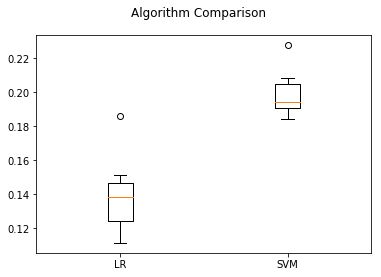

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Preprocess

In [14]:
df

,PMID,Sentence_ID,Sentence,Gene1|Gene1_ID,Gene1_Index(start|end),Gene2|Gene2_ID,Gene2_Index(start|end),RE_Type
0,24003223,S1,A brain-specific Grb2-associated regulator of ...,Erk|5594,225|228,GAREM2|150946,147|153,Neutral_Regulation
1,24003223,S2,Grb2-associated regulator of Erk/MAPK1 (GAREM)...,Grb2-associated regulator of Erk/MAPK1 (GAREM)...,0|46,EGF|1950,77|80,NoRE
2,24003223,S5,"Therefore, previously identified GAREM is name...",GAREM|64762,34|39,GAREM1|64762,49|55,NoRE
3,24003223,S6,"Here we characterized a new subtype of GAREM, ...",GAREM|381126,40|45,GAREM2|242915,47|53,NoRE
4,24003223,S7,"Three GAREM2 tyrosines (Tyr-102, Tyr-429, and ...",Grb2|2885,128|132,GAREM2|150946,6|12,Binding
5,24003223,S7,"Three GAREM2 tyrosines (Tyr-102, Tyr-429, and ...",EGF|1950,79|82,GAREM2|150946,6|12,Modification
6,24003223,S8,"Furthermore, GAREM2 and Shp2 regulate Erk acti...",Erk|5594,38|41,GAREM2|150946,13|19,Neutral_Regulation
7,24003223,S8,"Furthermore, GAREM2 and Shp2 regulate Erk acti...",Erk|5594,38|41,Shp2|5781,24|28,Neutral_Regulation
8,24003223,S10,GAREM2 is expressed in some neuroblastoma cell...,Grb2|2885,102|106,GAREM2|150946,0|6,Binding
9,24003223,S11,"Eventually, GAREM2 regulates Erk activation in...",GAREM2|150946,12|18,Erk|5594,29|32,Positive_Regulation


In [15]:
df[['Sentence', 'Gene1_Index(start|end)', 'Gene2_Index(start|end)']]

,Sentence,Gene1_Index(start|end),Gene2_Index(start|end)
0,A brain-specific Grb2-associated regulator of ...,225|228,147|153
1,Grb2-associated regulator of Erk/MAPK1 (GAREM)...,0|46,77|80
2,"Therefore, previously identified GAREM is name...",34|39,49|55
3,"Here we characterized a new subtype of GAREM, ...",40|45,47|53
4,"Three GAREM2 tyrosines (Tyr-102, Tyr-429, and ...",128|132,6|12
5,"Three GAREM2 tyrosines (Tyr-102, Tyr-429, and ...",79|82,6|12
6,"Furthermore, GAREM2 and Shp2 regulate Erk acti...",38|41,13|19
7,"Furthermore, GAREM2 and Shp2 regulate Erk acti...",38|41,24|28
8,GAREM2 is expressed in some neuroblastoma cell...,102|106,0|6
9,"Eventually, GAREM2 regulates Erk activation in...",12|18,29|32


In [16]:
df.loc[0]

PMID                                                               24003223
Sentence_ID                                                              S1
Sentence                  A brain-specific Grb2-associated regulator of ...
Gene1|Gene1_ID                                                     Erk|5594
Gene1_Index(start|end)                                              225|228
Gene2|Gene2_ID                                                GAREM2|150946
Gene2_Index(start|end)                                              147|153
RE_Type                                                  Neutral_Regulation
Name: 0, dtype: object

In [17]:
df.loc[0:2].Sentence

0    A brain-specific Grb2-associated regulator of ...
1    Grb2-associated regulator of Erk/MAPK1 (GAREM)...
2    Therefore, previously identified GAREM is name...
Name: Sentence, dtype: object

In [18]:
df.loc[0:2]['Gene1_Index(start|end)']

0    225|228
1       0|46
2      34|39
Name: Gene1_Index(start|end), dtype: object

In [19]:
def splitIndex(index):
    return index.split('|') 
splitIndex(df.loc[0]['Gene1_Index(start|end)'])

['225', '228']

In [20]:
print(df.loc[0].Sentence)
def Replace2Gene(start, end, text, symbol):
    return text[0:int(start)] + symbol + text[int(end):]
Replace2Gene(225, 228, df.Sentence[0], "__GENE1__")

A brain-specific Grb2-associated regulator of extracellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, GAREM2, contributes to neurite outgrowth of neuroblastoma cells by regulating Erk signaling.


'A brain-specific Grb2-associated regulator of extracellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, GAREM2, contributes to neurite outgrowth of neuroblastoma cells by regulating __GENE1__ signaling.'

In [21]:
df['Gene2_Index(start|end)'][0]

'147|153'

In [22]:
Replace2Gene(147, 153, Replace2Gene(225, 228, df.Sentence[0], "__GENE1__"), "__GENE2__")

'A brain-specific Grb2-associated regulator of extracellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, __GENE2__, contributes to neurite outgrowth of neuroblastoma cells by regulating __GENE1__ signaling.'

In [23]:
def Replace(row):
    return Replace2Gene(splitIndex(row['Gene1_Index(start|end)'])[0], 
                       splitIndex(row['Gene1_Index(start|end)'])[1], 
                       row.Sentence, "__GENE1__")
df['Replaced']=df.apply(Replace, axis=1)

In [24]:
df

,PMID,Sentence_ID,Sentence,Gene1|Gene1_ID,Gene1_Index(start|end),Gene2|Gene2_ID,Gene2_Index(start|end),RE_Type,Replaced
0,24003223,S1,A brain-specific Grb2-associated regulator of ...,Erk|5594,225|228,GAREM2|150946,147|153,Neutral_Regulation,A brain-specific Grb2-associated regulator of ...
1,24003223,S2,Grb2-associated regulator of Erk/MAPK1 (GAREM)...,Grb2-associated regulator of Erk/MAPK1 (GAREM)...,0|46,EGF|1950,77|80,NoRE,__GENE1__ is an adaptor molecule in the EGF-me...
2,24003223,S5,"Therefore, previously identified GAREM is name...",GAREM|64762,34|39,GAREM1|64762,49|55,NoRE,"Therefore, previously identified G__GENE1__is ..."
3,24003223,S6,"Here we characterized a new subtype of GAREM, ...",GAREM|381126,40|45,GAREM2|242915,47|53,NoRE,Here we characterized a new subtype of G__GENE...
4,24003223,S7,"Three GAREM2 tyrosines (Tyr-102, Tyr-429, and ...",Grb2|2885,128|132,GAREM2|150946,6|12,Binding,"Three GAREM2 tyrosines (Tyr-102, Tyr-429, and ..."
5,24003223,S7,"Three GAREM2 tyrosines (Tyr-102, Tyr-429, and ...",EGF|1950,79|82,GAREM2|150946,6|12,Modification,"Three GAREM2 tyrosines (Tyr-102, Tyr-429, and ..."
6,24003223,S8,"Furthermore, GAREM2 and Shp2 regulate Erk acti...",Erk|5594,38|41,GAREM2|150946,13|19,Neutral_Regulation,"Furthermore, GAREM2 and Shp2 regulate __GENE1_..."
7,24003223,S8,"Furthermore, GAREM2 and Shp2 regulate Erk acti...",Erk|5594,38|41,Shp2|5781,24|28,Neutral_Regulation,"Furthermore, GAREM2 and Shp2 regulate __GENE1_..."
8,24003223,S10,GAREM2 is expressed in some neuroblastoma cell...,Grb2|2885,102|106,GAREM2|150946,0|6,Binding,GAREM2 is expressed in some neuroblastoma cell...
9,24003223,S11,"Eventually, GAREM2 regulates Erk activation in...",GAREM2|150946,12|18,Erk|5594,29|32,Positive_Regulation,"Eventually, __GENE1__ regulates Erk activation..."


In [25]:
df['Replaced'][0]

'A brain-specific Grb2-associated regulator of extracellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, GAREM2, contributes to neurite outgrowth of neuroblastoma cells by regulating __GENE1__ signaling.'

In [26]:
sentences = df['Replaced']
vectorizer = TfidfVectorizer(min_df=0, lowercase=True, stop_words ='english')
vectorizer.fit(sentences)
X = vectorizer.transform(sentences)
Y = target

In [27]:
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', multi_class='multinomial',max_iter=1000)))
models.append(('SVM', SVC(kernel='linear')))

In [28]:
tenFoldCV(scoring)

D:\Programming\Anaconda3\envs\kernas\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programming\Anaconda3\envs\kernas\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
D:\Programming\Anaconda3\envs\kernas\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programming\Anaconda3\envs\kernas\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
D:\Programming\Anaconda3\envs\kernas\l

LR: 0.153305 (0.020840)
SVM: 0.206191 (0.013696)


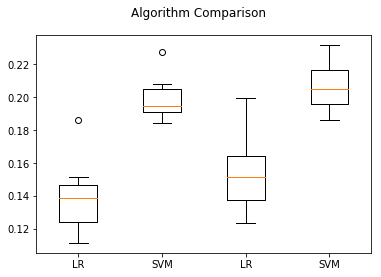

In [29]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()